In [2]:
#%%
# Importing necessary libraries
import pandas as pd
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

Problem 1

Identifying a highly imbalanced Target Variable

In [44]:
#1 Import Dataset
data = pd.read_csv("/content/archive.zip")

In [ ]:
data.head()

,Brand,Model,Year,Country,Condition,Engine_Size,Horsepower,Torque,Weight,Top_Speed,...,Mileage,Popularity,Safety_Rating,Number_of_Owners,Market_Demand,Insurance_Cost,Production_Units,Log_Price,Log_Mileage,Modification
0,Nissan,720S,2006,Asia,used,3.7,420,705,1785,238,...,96664,Low,2,4,Medium,13410,5000,11.309352,11.479007,V-Spec
1,McLaren,911 Turbo S,2009,Europe,new,5.3,1104,766,992,386,...,159630,High,2,2,Medium,10795,1000,12.639334,11.980620,NaN
2,Chevrolet,M4 Competition,2009,USA,new,5.5,153,1573,2022,397,...,111496,High,1,2,Low,1716,20000,12.948902,11.621753,NaN
3,Bugatti,Chiron,1982,Asia,used,5.4,544,1009,1091,151,...,217228,High,2,4,Medium,11618,20000,11.725542,12.288707,NaN
4,Nissan,Chiron,2022,Europe,new,2.4,980,693,1232,385,...,150318,Low,3,2,Medium,11324,100000,11.229289,11.920515,NaN


In [ ]:
data.describe()

,Year,Engine_Size,Horsepower,Torque,Weight,Top_Speed,Acceleration_0_100,Fuel_Efficiency,CO2_Emissions,Price,Mileage,Safety_Rating,Number_of_Owners,Insurance_Cost,Production_Units,Log_Price,Log_Mileage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2001.904800,4.828700,822.891600,938.800600,1689.724200,274.857000,4.517280,10.038340,272.695200,262067.329400,126487.020800,2.502200,2.479200,7749.857800,26496.010000,12.266985,11.449482
std,12.873697,1.858353,401.362549,472.954278,465.786421,72.062214,1.448473,2.881613,100.154245,137678.803906,72773.504601,1.119038,1.114368,4177.751738,36767.027776,0.741124,0.973881
min,1980.000000,1.600000,130.000000,120.000000,900.000000,150.000000,2.000000,5.000000,100.000000,20014.000000,47.000000,1.000000,1.000000,501.000000,50.000000,9.904237,3.871201
25%,1991.000000,3.200000,472.000000,522.000000,1286.000000,214.000000,3.300000,7.600000,186.000000,143710.750000,63809.750000,1.000000,1.000000,4106.750000,1000.000000,11.875565,11.063677
50%,2002.000000,4.800000,815.500000,948.000000,1684.000000,275.000000,4.500000,10.000000,273.000000,265213.500000,126762.500000,3.000000,2.000000,7697.500000,5000.000000,12.488294,11.750078
75%,2013.000000,6.500000,1176.000000,1345.000000,2101.000000,337.000000,5.800000,12.600000,357.000000,380923.500000,190287.500000,3.000000,3.000000,11351.750000,20000.000000,12.850356,12.156297
max,2024.000000,8.000000,1521.000000,1758.000000,2499.000000,399.000000,7.000000,15.000000,449.000000,499991.000000,249956.000000,4.000000,4.000000,14998.000000,100000.000000,13.122347,12.429044


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               5000 non-null   object 
 1   Model               5000 non-null   object 
 2   Year                5000 non-null   int64  
 3   Country             5000 non-null   object 
 4   Condition           5000 non-null   object 
 5   Engine_Size         5000 non-null   float64
 6   Horsepower          5000 non-null   int64  
 7   Torque              5000 non-null   int64  
 8   Weight              5000 non-null   int64  
 9   Top_Speed           5000 non-null   int64  
 10  Acceleration_0_100  5000 non-null   float64
 11  Fuel_Type           5000 non-null   object 
 12  Drivetrain          5000 non-null   object 
 13  Transmission        5000 non-null   object 
 14  Fuel_Efficiency     5000 non-null   float64
 15  CO2_Emissions       5000 non-null   int64  
 16  Price 

In [ ]:
for column in ['Brand', 'Model', 'Country', 'Condition', 'Fuel_Type', 'Drivetrain', 'Transmission', 'Popularity', 'Market_Demand', 'Modification']:
  for value in data[column].unique():
    print(value)

Nissan
McLaren
Chevrolet
Bugatti
BMW
Porsche
Aston Martin
Lamborghini
Ferrari
Ford
720S
911 Turbo S
M4 Competition
Chiron
GT-R
Mustang GT
DBS
Huracan
Corvette Z06
488 GTB
Asia
Europe
USA
used
new
salvage
restored
Diesel
Electric
Petrol
RWD
FWD
AWD
Automatic
DCT
CVT
Manual
Low
High
Medium
Medium
Low
High
V-Spec
nan
Nismo
Supercharged
GT
Turbo
Track Edition
Sport
RS


In [ ]:
data['Popularity'].value_counts()

,count
Popularity,
Low,2001
High,1985
Medium,1014


In [ ]:
data['Market_Demand'].value_counts()

,count
Market_Demand,
Low,1704
Medium,1678
High,1618


In [ ]:
data['Price'].describe()

,Price
count,5000.000000
mean,262067.329400
std,137678.803906
min,20014.000000
25%,143710.750000
50%,265213.500000
75%,380923.500000
max,499991.000000


In [45]:
##  Add column, if 'Price' is greater than 100000
data['Price_Category'] = data['Price'].apply(lambda x: 1 if x > 100000 else 0)

In [46]:
data['Price_Category'].value_counts()

,count
Price_Category,
1,4190
0,810


Transforming data from categorical to numerical

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               5000 non-null   object 
 1   Model               5000 non-null   object 
 2   Year                5000 non-null   int64  
 3   Country             5000 non-null   object 
 4   Condition           5000 non-null   object 
 5   Engine_Size         5000 non-null   float64
 6   Horsepower          5000 non-null   int64  
 7   Torque              5000 non-null   int64  
 8   Weight              5000 non-null   int64  
 9   Top_Speed           5000 non-null   int64  
 10  Acceleration_0_100  5000 non-null   float64
 11  Fuel_Type           5000 non-null   object 
 12  Drivetrain          5000 non-null   object 
 13  Transmission        5000 non-null   object 
 14  Fuel_Efficiency     5000 non-null   float64
 15  CO2_Emissions       5000 non-null   int64  
 16  Price 

In [47]:
data = data.replace({'Low': 1, 'Medium': 2, 'High': 3})

<ipython-input-47-0335a2732484>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({'Low': 1, 'Medium': 2, 'High': 3})


In [48]:
data = pd.get_dummies(data, columns=['Brand', 'Model', 'Country', 'Condition', 'Fuel_Type', 'Drivetrain', 'Transmission', 'Modification'])
data = data.replace({True: 1, False: 0})

<ipython-input-48-d394abd91a9d>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({True: 1, False: 0})


In [49]:
##Remove Log_price and Log_mileage
data = data.drop(['Log_Price', 'Log_Mileage'], axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 63 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        5000 non-null   int64  
 1   Engine_Size                 5000 non-null   float64
 2   Horsepower                  5000 non-null   int64  
 3   Torque                      5000 non-null   int64  
 4   Weight                      5000 non-null   int64  
 5   Top_Speed                   5000 non-null   int64  
 6   Acceleration_0_100          5000 non-null   float64
 7   Fuel_Efficiency             5000 non-null   float64
 8   CO2_Emissions               5000 non-null   int64  
 9   Price                       5000 non-null   int64  
 10  Mileage                     5000 non-null   int64  
 11  Popularity                  5000 non-null   int64  
 12  Safety_Rating               5000 non-null   int64  
 13  Number_of_Owners            5000 

#1a  Train a basic classifier without handling the imbalance.

In [50]:
X = data.drop(columns='Price_Category')
y = data['Price_Category']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Preprocess data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
# Train classifier
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [53]:
# Make predictions
y_pred = classifier.predict(X_test)

In [54]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       158
           1       0.99      0.99      0.99       842

    accuracy                           0.99      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.99      0.99      0.99      1000



#1C Oversampling

In [ ]:
#Oversampling using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
y_resampled.value_counts()

,count
Price_Category,
0,4190
1,4190


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Preprocess data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train classifier
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       817
           1       0.99      0.99      0.99       859

    accuracy                           0.99      1676
   macro avg       0.99      0.99      0.99      1676
weighted avg       0.99      0.99      0.99      1676



#1C Undersampling using Tomek Links

#2 Correlation Analysis

#2a Pearson Correlation Coefficient matrix

In [16]:
#1 Import Dataset
data = pd.read_csv("/content/archive.zip")

In [17]:
data.head()

,Brand,Model,Year,Country,Condition,Engine_Size,Horsepower,Torque,Weight,Top_Speed,...,Mileage,Popularity,Safety_Rating,Number_of_Owners,Market_Demand,Insurance_Cost,Production_Units,Log_Price,Log_Mileage,Modification
0,Nissan,720S,2006,Asia,used,3.7,420,705,1785,238,...,96664,Low,2,4,Medium,13410,5000,11.309352,11.479007,V-Spec
1,McLaren,911 Turbo S,2009,Europe,new,5.3,1104,766,992,386,...,159630,High,2,2,Medium,10795,1000,12.639334,11.980620,NaN
2,Chevrolet,M4 Competition,2009,USA,new,5.5,153,1573,2022,397,...,111496,High,1,2,Low,1716,20000,12.948902,11.621753,NaN
3,Bugatti,Chiron,1982,Asia,used,5.4,544,1009,1091,151,...,217228,High,2,4,Medium,11618,20000,11.725542,12.288707,NaN
4,Nissan,Chiron,2022,Europe,new,2.4,980,693,1232,385,...,150318,Low,3,2,Medium,11324,100000,11.229289,11.920515,NaN


In [18]:
data.drop(['Brand', 'Model', 'Year', 'Country', 'Condition', 'Fuel_Type', 'Drivetrain', 'Transmission', 'Modification', 'Log_Price', 'Log_Mileage'], axis=1, inplace=True)
data = data.replace({'Low': 1, 'Medium': 2, 'High': 3})

<ipython-input-18-99f836a51a6e>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({'Low': 1, 'Medium': 2, 'High': 3})


In [19]:
data.head()

,Engine_Size,Horsepower,Torque,Weight,Top_Speed,Acceleration_0_100,Fuel_Efficiency,CO2_Emissions,Price,Mileage,Popularity,Safety_Rating,Number_of_Owners,Market_Demand,Insurance_Cost,Production_Units
0,3.7,420,705,1785,238,5.7,10.5,307,81580,96664,1,2,4,2,13410,5000
1,5.3,1104,766,992,386,4.6,9.4,113,308455,159630,3,2,2,2,10795,1000
2,5.5,153,1573,2022,397,6.7,5.0,321,420374,111496,3,1,2,1,1716,20000
3,5.4,544,1009,1091,151,2.7,7.3,343,123690,217228,3,2,4,2,11618,20000
4,2.4,980,693,1232,385,3.0,6.0,246,75303,150318,1,3,2,2,11324,100000


In [20]:
##Create the correlation matrix
correlation_matrix = data.corr()

Text(0.5, 1.0, 'Correlation Heatmap')

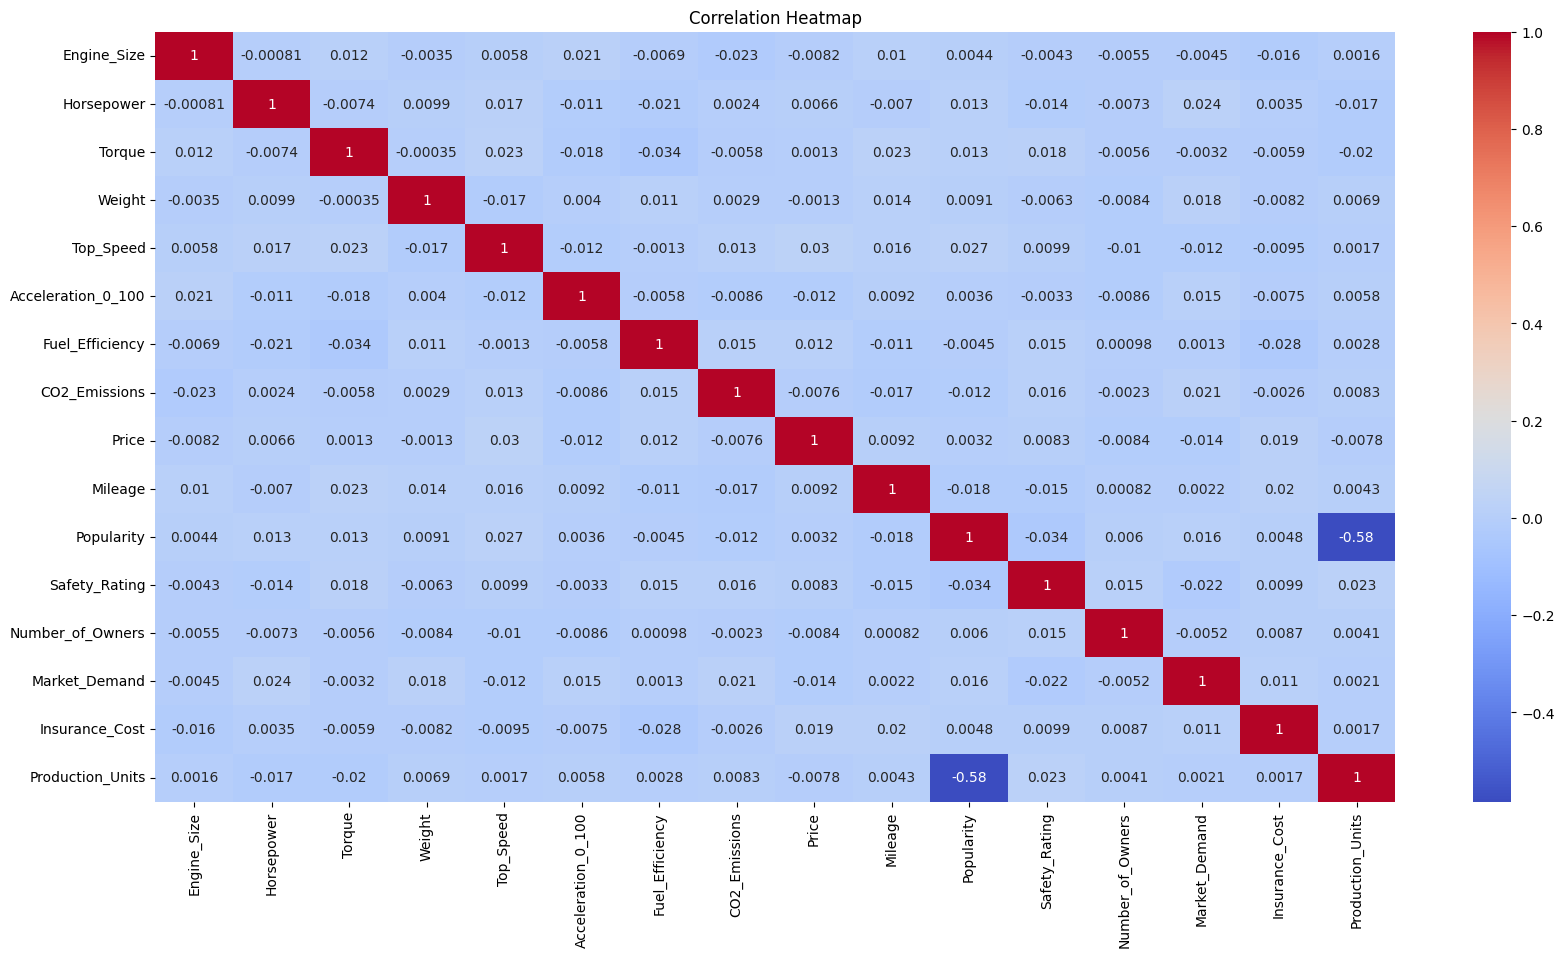

In [21]:
##Heatmap
fig, ax = plt.subplots(figsize=(20, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax)
heatmap.set_title('Correlation Heatmap')

In [22]:
# Unstack the correlation matrix and sort by correlation value
corr_pairs = correlation_matrix.unstack()
sorted_corr_pairs = corr_pairs.sort_values(kind="quicksort", ascending=False)

# Remove self-correlations
sorted_corr_pairs = sorted_corr_pairs[sorted_corr_pairs < 1]
sorted_corr_pairs = sorted_corr_pairs.drop_duplicates()



# Print the sorted correlation pairs

In [23]:
sorted_corr_pairs.head(3)

,,0
Price,Top_Speed,0.029831
Popularity,Top_Speed,0.026731
Horsepower,Market_Demand,0.024177


In [24]:
sorted_corr_pairs.tail(3)

,,0
Fuel_Efficiency,Torque,-0.033617
Safety_Rating,Popularity,-0.034426
Production_Units,Popularity,-0.583622


#3 Multiple Linear Regression Model

In [78]:
#1 Import Dataset
data = pd.read_csv("/content/archive.zip")

Preprocessing

In [79]:
#check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               5000 non-null   object 
 1   Model               5000 non-null   object 
 2   Year                5000 non-null   int64  
 3   Country             5000 non-null   object 
 4   Condition           5000 non-null   object 
 5   Engine_Size         5000 non-null   float64
 6   Horsepower          5000 non-null   int64  
 7   Torque              5000 non-null   int64  
 8   Weight              5000 non-null   int64  
 9   Top_Speed           5000 non-null   int64  
 10  Acceleration_0_100  5000 non-null   float64
 11  Fuel_Type           5000 non-null   object 
 12  Drivetrain          5000 non-null   object 
 13  Transmission        5000 non-null   object 
 14  Fuel_Efficiency     5000 non-null   float64
 15  CO2_Emissions       5000 non-null   int64  
 16  Price 

In [80]:
#Check missing values
data.isnull().sum()

,0
Brand,0
Model,0
Year,0
Country,0
Condition,0
Engine_Size,0
Horsepower,0
Torque,0
Weight,0
Top_Speed,0


Replace categorical values with numerical values

In [81]:
data = data.replace({'Low': 1, 'Medium': 2, 'High': 3})

<ipython-input-81-0335a2732484>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({'Low': 1, 'Medium': 2, 'High': 3})


In [82]:
data = pd.get_dummies(data, columns=['Brand', 'Model', 'Country', 'Condition', 'Fuel_Type', 'Drivetrain', 'Transmission', 'Modification'])
data = data.replace({True: 1, False: 0})

<ipython-input-82-d394abd91a9d>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({True: 1, False: 0})


In [83]:
##Remove Log_price and Log_mileage
data = data.drop(['Log_Price', 'Log_Mileage'], axis=1)

In [60]:
data.head()

,Year,Engine_Size,Horsepower,Torque,Weight,Top_Speed,Acceleration_0_100,Fuel_Efficiency,CO2_Emissions,Price,...,Transmission_DCT,Transmission_Manual,Modification_GT,Modification_Nismo,Modification_RS,Modification_Sport,Modification_Supercharged,Modification_Track Edition,Modification_Turbo,Modification_V-Spec
0,2006,3.7,420,705,1785,238,5.7,10.5,307,81580,...,0,0,0,0,0,0,0,0,0,1
1,2009,5.3,1104,766,992,386,4.6,9.4,113,308455,...,1,0,0,0,0,0,0,0,0,0
2,2009,5.5,153,1573,2022,397,6.7,5.0,321,420374,...,0,0,0,0,0,0,0,0,0,0
3,1982,5.4,544,1009,1091,151,2.7,7.3,343,123690,...,0,0,0,0,0,0,0,0,0,0
4,2022,2.4,980,693,1232,385,3.0,6.0,246,75303,...,1,0,0,0,0,0,0,0,0,0


In [84]:
#Normalize data using Min-Max Scaling
data_MinMax = (data - data.min()) / (data.max() - data.min())
data_MinMax.head()

,Year,Engine_Size,Horsepower,Torque,Weight,Top_Speed,Acceleration_0_100,Fuel_Efficiency,CO2_Emissions,Price,...,Transmission_DCT,Transmission_Manual,Modification_GT,Modification_Nismo,Modification_RS,Modification_Sport,Modification_Supercharged,Modification_Track Edition,Modification_Turbo,Modification_V-Spec
0,0.590909,0.328125,0.208483,0.357143,0.553471,0.353414,0.74,0.55,0.593123,0.128269,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.659091,0.578125,0.700216,0.394383,0.057536,0.947791,0.52,0.44,0.037249,0.600948,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.659091,0.609375,0.016535,0.887057,0.701689,0.991968,0.94,0.00,0.633238,0.834123,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.045455,0.593750,0.297628,0.542735,0.119450,0.004016,0.14,0.23,0.696275,0.216002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.954545,0.125000,0.611071,0.349817,0.207630,0.943775,0.20,0.10,0.418338,0.115191,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Build a Multiple Linear Regression Model

In [85]:
X = data_MinMax.drop(columns='Price')
y = data_MinMax['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [87]:
# regression coefficients
print('Coefficients: ', model.coef_)

# variance score
print('Variance score: {}'.format(model.score(X_test, y_test)))

Coefficients:  [-1.03757909e-02 -1.50451699e-02 -3.14311837e-03  4.59453178e-03
  4.87619714e-03  3.05596689e-02 -2.06459519e-02  1.88210801e-02
  1.20306520e-02  1.00182688e-02 -3.26282423e-03  4.66237728e-03
 -6.81580769e-03 -1.22074177e-02  2.66029799e-02 -2.01808075e-03
 -8.29719555e-03  2.56872868e-02  2.46933034e-03  4.48480204e-03
 -7.19748529e-03 -1.30665198e-02 -8.79783972e-03  2.21682515e-02
 -5.58233929e-03 -1.18682910e-02 -9.75639194e-04  4.10142501e-02
 -3.15329721e-02 -8.57741485e-03  2.19931038e-02 -2.29879303e-03
 -4.27245278e-03 -1.81111980e-02  2.86049555e-03 -9.93795029e-05
 -6.64614465e-03  3.32367177e-04  6.31377747e-03 -8.26120869e-03
  5.32080272e-03 -2.90507505e-03  5.84548102e-03  5.31149029e-03
 -4.69702305e-04 -4.84178798e-03 -4.60149400e-03  3.01088402e-03
  1.59060999e-03 -9.50253546e-03 -1.28555438e-03  9.37616038e-03
  1.41192946e-03 -3.06683764e-02  3.09311913e-03  6.61135356e-05
 -2.01298577e-02 -6.10154953e-03  2.27896390e-02  3.19828305e-02
  2.961254

In [88]:
y_pred = model.predict(X_test)

Check Assumptions

Linearity (using Scatterplots)

In [94]:
#print list of every variable in data_Minmax
print(data_MinMax.columns)

Index(['Year', 'Engine_Size', 'Horsepower', 'Torque', 'Weight', 'Top_Speed',
       'Acceleration_0_100', 'Fuel_Efficiency', 'CO2_Emissions', 'Price',
       'Mileage', 'Popularity', 'Safety_Rating', 'Number_of_Owners',
       'Market_Demand', 'Insurance_Cost', 'Production_Units',
       'Brand_Aston Martin', 'Brand_BMW', 'Brand_Bugatti', 'Brand_Chevrolet',
       'Brand_Ferrari', 'Brand_Ford', 'Brand_Lamborghini', 'Brand_McLaren',
       'Brand_Nissan', 'Brand_Porsche', 'Model_488 GTB', 'Model_720S',
       'Model_911 Turbo S', 'Model_Chiron', 'Model_Corvette Z06', 'Model_DBS',
       'Model_GT-R', 'Model_Huracan', 'Model_M4 Competition',
       'Model_Mustang GT', 'Country_Asia', 'Country_Europe', 'Country_USA',
       'Condition_new', 'Condition_restored', 'Condition_salvage',
       'Condition_used', 'Fuel_Type_Diesel', 'Fuel_Type_Electric',
       'Fuel_Type_Petrol', 'Drivetrain_AWD', 'Drivetrain_FWD',
       'Drivetrain_RWD', 'Transmission_Automatic', 'Transmission_CVT',
       '

<ipython-input-107-e2b32d19a9d4>:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(2, 2))


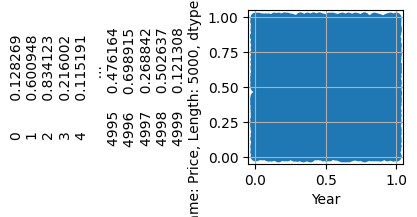

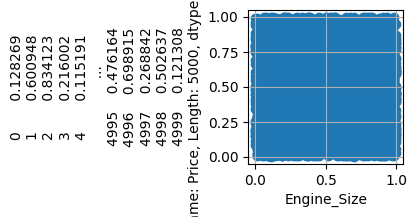

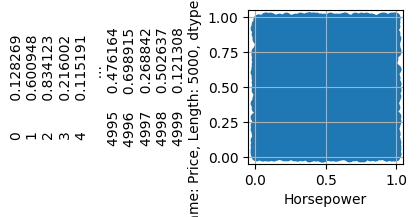

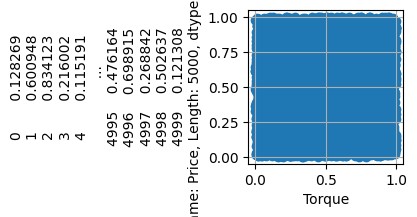

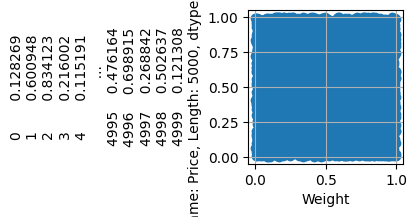

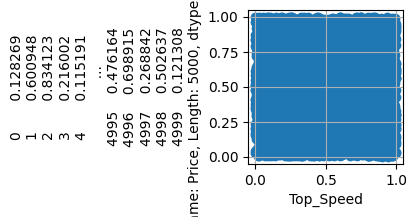

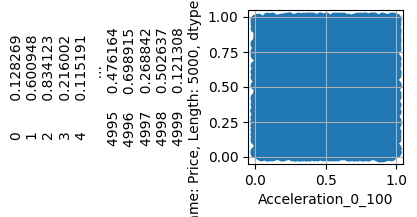

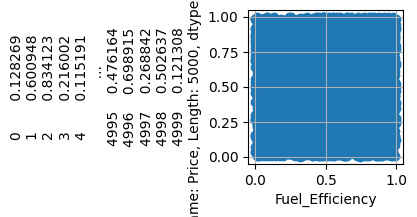

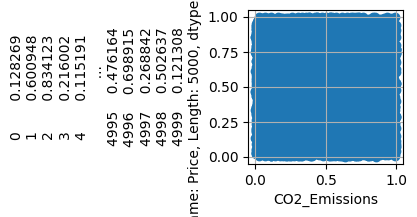

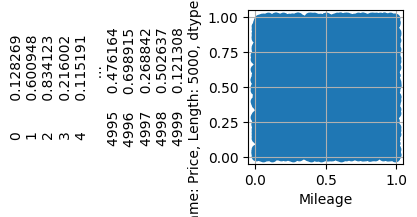

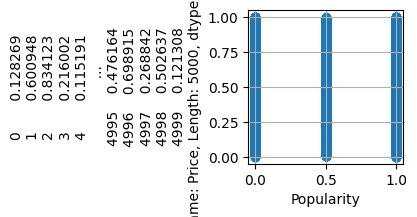

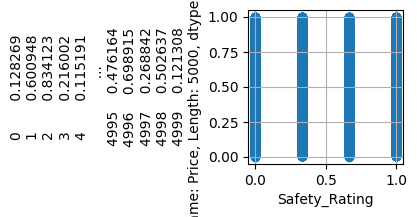

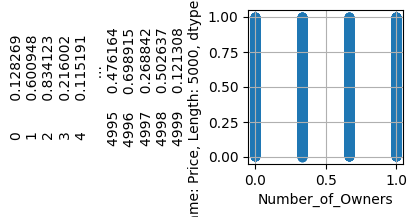

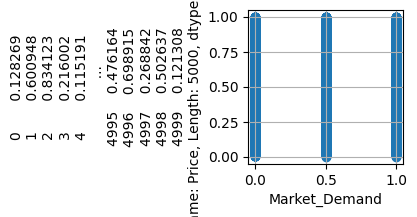

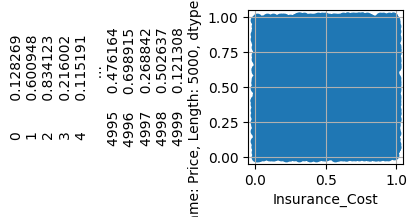

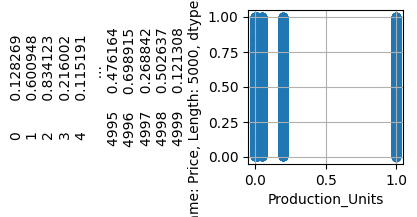

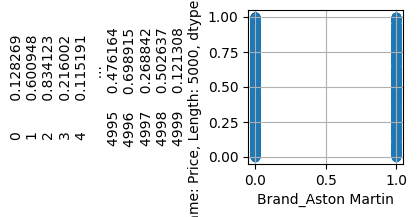

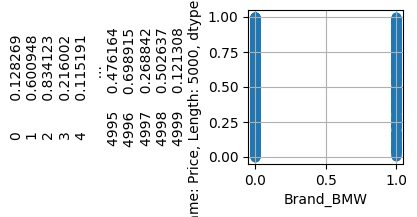

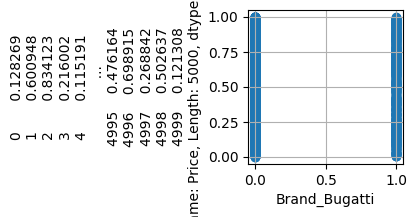

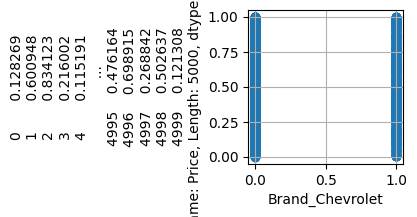

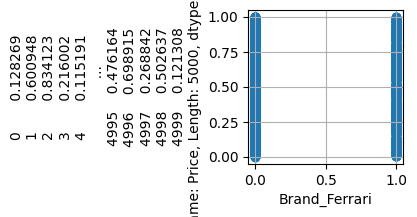

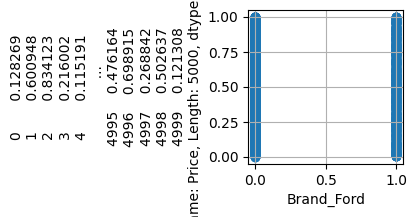

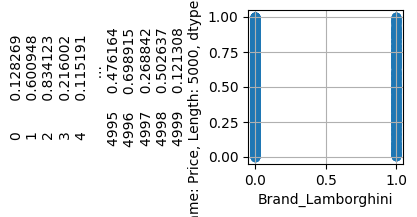

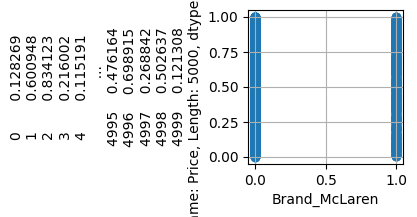

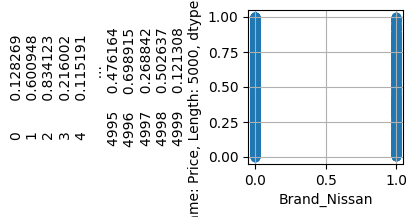

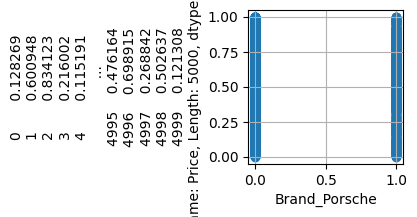

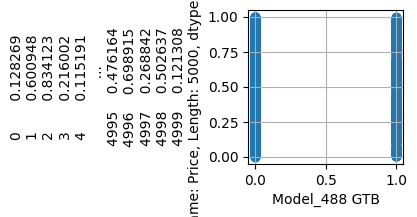

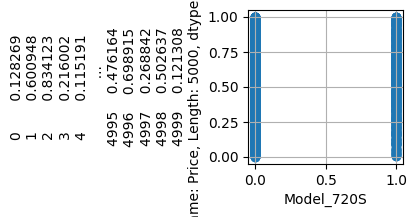

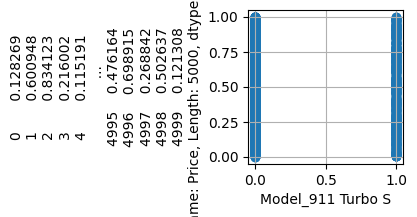

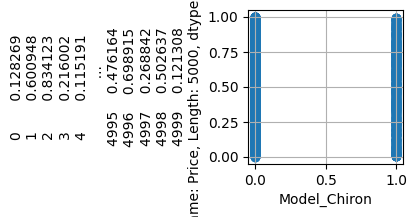

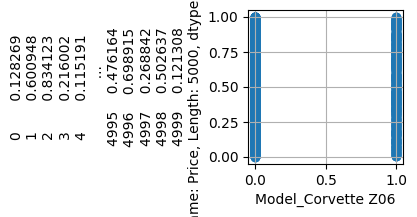

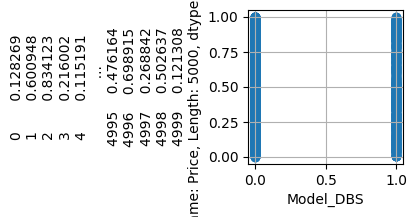

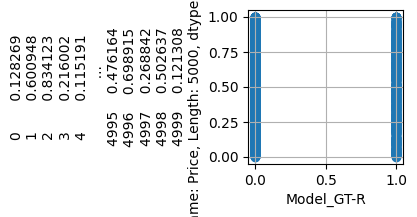

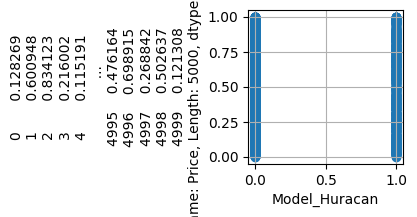

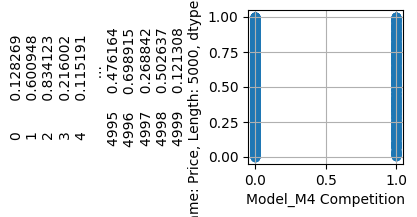

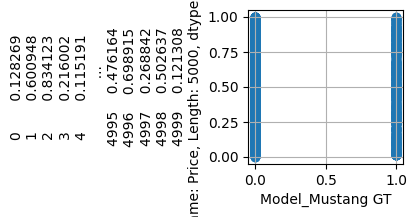

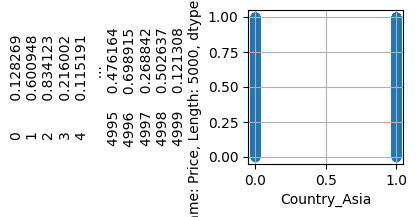

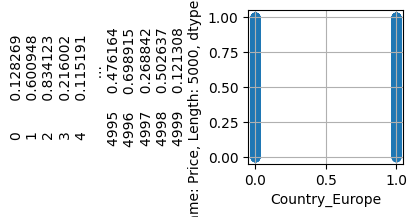

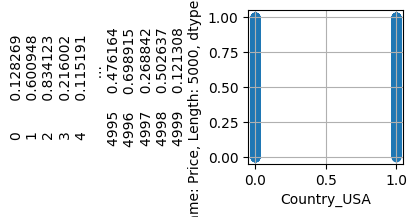

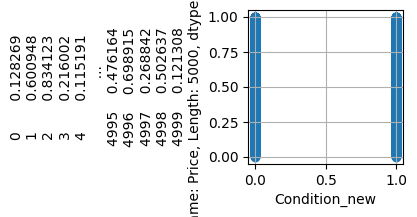

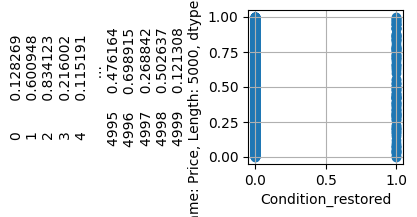

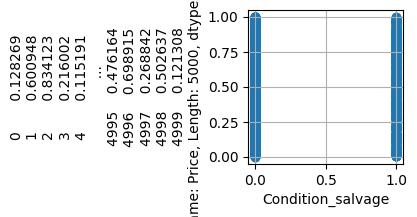

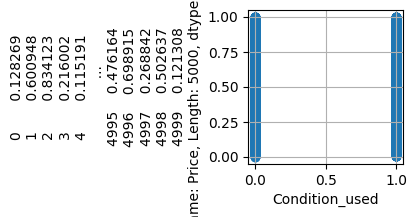

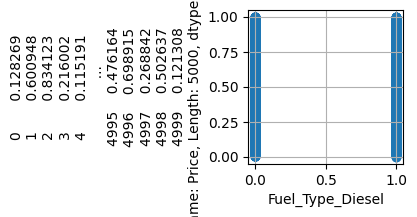

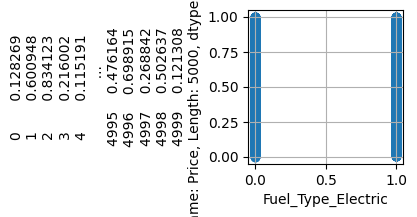

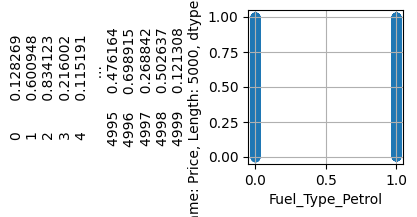

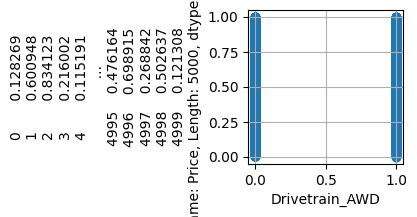

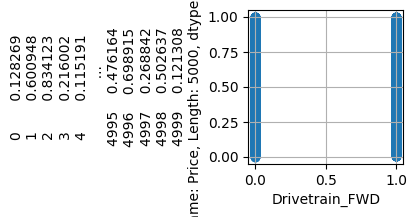

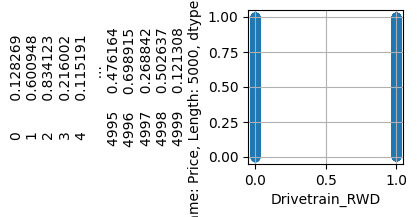

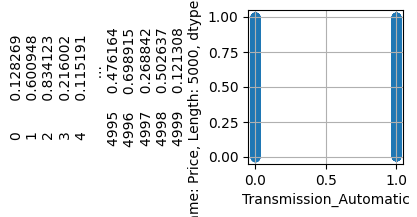

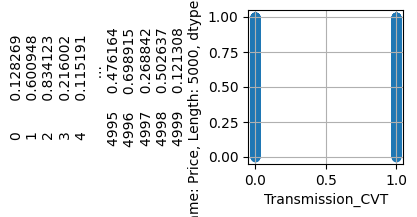

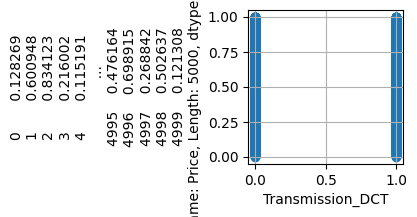

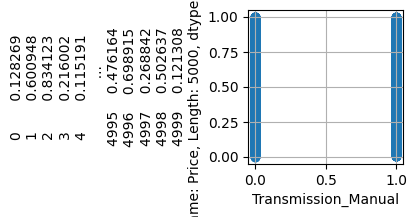

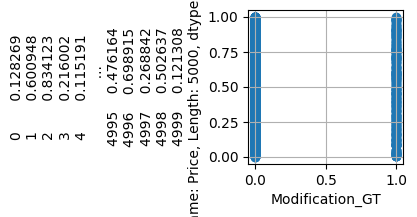

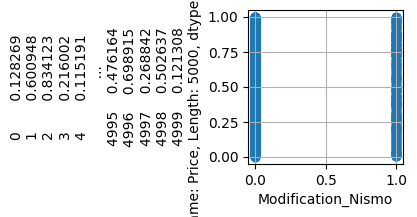

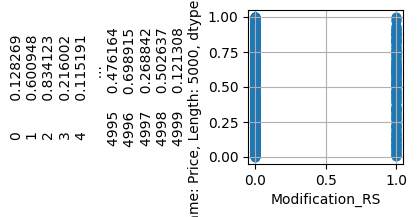

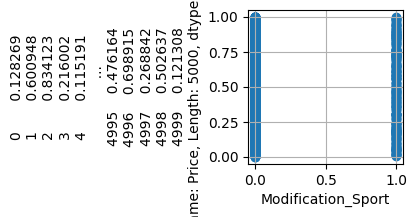

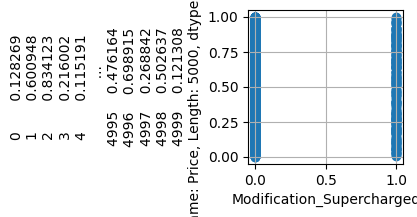

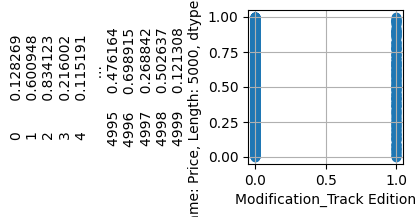

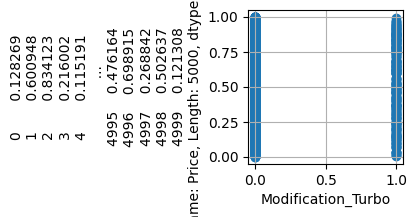

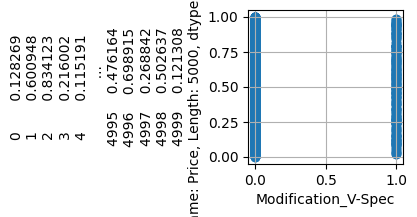

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

independent_variables= ['Year', 'Engine_Size', 'Horsepower', 'Torque', 'Weight', 'Top_Speed',
       'Acceleration_0_100', 'Fuel_Efficiency', 'CO2_Emissions',
       'Mileage', 'Popularity', 'Safety_Rating', 'Number_of_Owners',
       'Market_Demand', 'Insurance_Cost', 'Production_Units',
       'Brand_Aston Martin', 'Brand_BMW', 'Brand_Bugatti', 'Brand_Chevrolet',
       'Brand_Ferrari', 'Brand_Ford', 'Brand_Lamborghini', 'Brand_McLaren',
       'Brand_Nissan', 'Brand_Porsche', 'Model_488 GTB', 'Model_720S',
       'Model_911 Turbo S', 'Model_Chiron', 'Model_Corvette Z06', 'Model_DBS',
       'Model_GT-R', 'Model_Huracan', 'Model_M4 Competition',
       'Model_Mustang GT', 'Country_Asia', 'Country_Europe', 'Country_USA',
       'Condition_new', 'Condition_restored', 'Condition_salvage',
       'Condition_used', 'Fuel_Type_Diesel', 'Fuel_Type_Electric',
       'Fuel_Type_Petrol', 'Drivetrain_AWD', 'Drivetrain_FWD',
       'Drivetrain_RWD', 'Transmission_Automatic', 'Transmission_CVT',
       'Transmission_DCT', 'Transmission_Manual', 'Modification_GT',
       'Modification_Nismo', 'Modification_RS', 'Modification_Sport',
       'Modification_Supercharged', 'Modification_Track Edition',
       'Modification_Turbo', 'Modification_V-Spec']

def plot_scatter(data_MinMax, Price, independent_variables):
  for independent_variable in independent_variables:
    plt.figure(figsize=(2, 2))
    plt.scatter(data_MinMax[independent_variable], data_MinMax['Price'])
    plt.xlabel(independent_variable)
    plt.ylabel(Price)
    plt.grid(True)


plot_scatter(data_MinMax, y, independent_variables)

Homoscedasticity

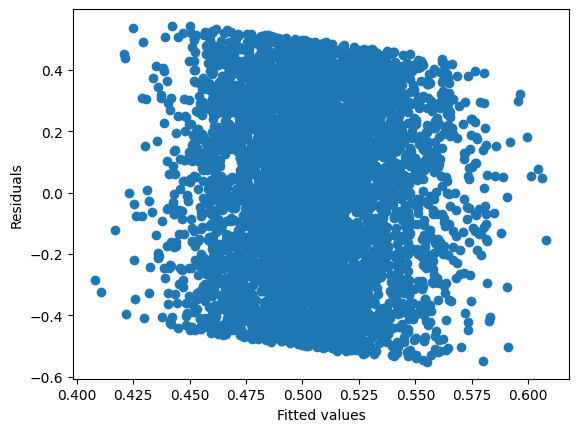

In [102]:
# Fit the model
model = sm.OLS(y, X).fit()

# Get the residuals
residuals = model.resid

# Get the fitted values
fitted_values = model.fittedvalues

plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

Normality of Residuals

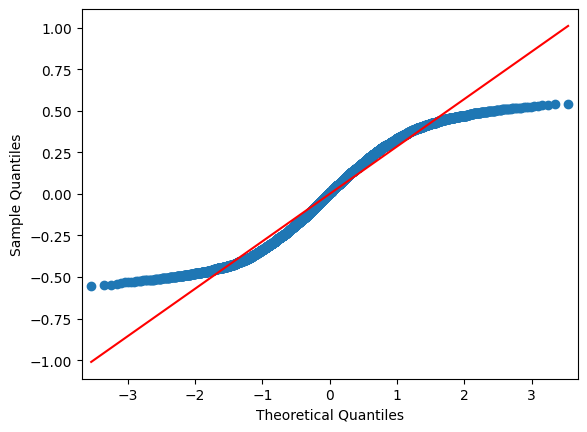

In [103]:
import statsmodels.api as sm

sm.qqplot(model.resid, line='s')
plt.show()

Multicollinearity

In [105]:
#(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                       feature       VIF
0                         Year  1.049337
1                  Engine_Size  1.009272
2                   Horsepower  1.010022
3                       Torque  1.017123
4                       Weight  1.007964
..                         ...       ...
56          Modification_Sport  1.034902
57   Modification_Supercharged  1.040187
58  Modification_Track Edition  1.039104
59          Modification_Turbo  1.038219
60         Modification_V-Spec  1.038642

[61 rows x 2 columns]


In [115]:

(vif_data)

,feature,VIF
0,Year,1.049337
1,Engine_Size,1.009272
2,Horsepower,1.010022
3,Torque,1.017123
4,Weight,1.007964
...,...,...
56,Modification_Sport,1.034902
57,Modification_Supercharged,1.040187
58,Modification_Track Edition,1.039104
59,Modification_Turbo,1.038219


Evaluate Model

In [89]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.08350998650732169


In [90]:
r_sq = model.score(X, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.007396431552311844


In [91]:
import numpy as np
from sklearn.metrics import r2_score

def adjusted_r2(y_true, y_predicted, num_predictors):
    r_squared = r2_score(y_true, y_predicted)
    n = len(y_true)
    p = num_predictors

    adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
    return adj_r_squared

# Call the function and assign the returned value to adj_r_squared
num_predictors = X_test.shape[1]  # Get the number of predictors from X_test
adj_r_squared = adjusted_r2(y_test, y_pred, num_predictors) #Calculate Adjusted R-squared

print(f"Adjusted R squared: {adj_r_squared}")

Adjusted R squared: -0.0825674418868314


In [92]:
#import necessary libraries
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE
sqrt(mean_squared_error(y_test, y_pred))

0.28898094488620124